In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cybersecurity_intrusion_data.csv')
df.head(20)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
5,SID_00006,453,UDP,5,380.471550,AES,0.422486,2,Chrome,1,0
6,SID_00007,815,ICMP,4,728.107165,AES,0.413772,1,Chrome,0,1
7,SID_00008,653,TCP,3,12.599906,DES,0.097719,3,Chrome,1,1
8,SID_00009,406,TCP,2,542.558895,NaN,0.294580,0,Chrome,1,0
9,SID_00010,608,UDP,6,531.944107,NaN,0.424117,1,Chrome,0,0


In [5]:
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [7]:
#Counting the missing values and dropping them
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

df.dropna(axis=0,inplace=True)

Total number of rows with missing values is  1966
since it is only 21 percent of the entire dataset the rows with missing values are excluded.


In [9]:
df.isnull().sum()

session_id             0
network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64

In [11]:
la_protocol = preprocessing.LabelEncoder()
la_protocol.fit(['TCP','UDP','ICMP'])
df.iloc[:,2] = la_protocol.transform(df.iloc[:,2])

la_encry = preprocessing.LabelEncoder()
la_encry.fit(['AES','DES'])
df.iloc[:,5] = la_encry.transform(df.iloc[:,5])

la_browser = preprocessing.LabelEncoder()
la_browser.fit(['Chrome','Firefox','Edge','Unknown','Safari'])
df.iloc[:,8] = la_browser.transform(df.iloc[:,8])

In [13]:
df.drop(['session_id'], axis=1)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,1,4,492.983263,1,0.606818,1,1,0,1
1,472,1,3,1557.996461,1,0.301569,0,2,0,0
2,629,1,3,75.044262,1,0.739164,2,0,0,1
3,804,2,4,601.248835,1,0.123267,0,4,0,1
4,453,1,5,532.540888,0,0.054874,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
9528,535,1,7,50.518476,1,0.767659,1,1,1,1
9531,746,1,7,315.151758,1,0.190059,3,0,0,1
9532,194,0,3,226.049889,0,0.517737,3,0,0,1
9534,664,1,5,35.170248,0,0.359200,1,2,0,0


In [55]:
X = np.asarray(df[['network_packet_size','login_attempts','session_duration','encryption_used','ip_reputation_score','failed_logins','browser_type']])
X[:5]

array([[0.5011128783805703, 4, -0.37515612000348325, 1,
        1.551457498376125, 1, 1],
       [-0.1388625647567052, 3, 0.9730616018054417, 1,
        -0.16398740225579017, 0, 2],
       [0.6522881799090605, 3, -0.9042319756468369, 1, 2.295219514068675,
        2, 0],
       [1.5341441054919205, 4, -0.23810095225159558, 1,
        -1.1660112796888047, 0, 4],
       [-0.2346069223914157, 5, -0.32507947199235415, 0,
        -1.5503693839771675, 1, 2]], dtype=object)

In [57]:
from sklearn.preprocessing import StandardScaler

# List of numerical features
numerical_features = ['network_packet_size','session_duration','ip_reputation_score']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [59]:
Y = np.asarray(df['attack_detected'])
Y[:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [63]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)

SVC()

In [64]:
yhat = clf.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       837
           1       0.97      0.75      0.85       678

    accuracy                           0.88      1515
   macro avg       0.90      0.87      0.88      1515
weighted avg       0.89      0.88      0.88      1515

Confusion matrix, without normalization
[[823  14]
 [167 511]]


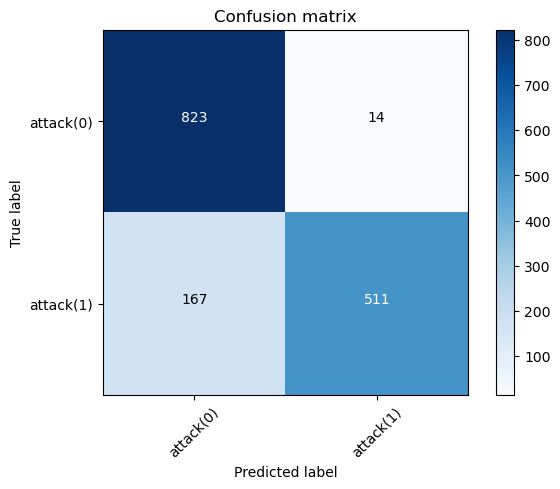

In [71]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['attack(0)','attack(1)'],normalize= False,  title='Confusion matrix')